In [1]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
od.download('https://www.kaggle.com/c/digit-recognizer/data?select=test.csv')

Skipping, found downloaded files in ".\digit-recognizer" (use force=True to force download)


In [3]:
mnist_df=pd.read_csv("./digit-recognizer/train.csv")

In [4]:
mnist_df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


now creating a series for   saving the labels


In [5]:
l_df=mnist_df.label

In [6]:
mnist_df.drop(columns='label',inplace=True)

In [7]:
mnist_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


randomly take any row lets see a visual reprsentation

In [8]:
grid_data=mnist_df.loc[5].to_numpy().reshape(28,28)

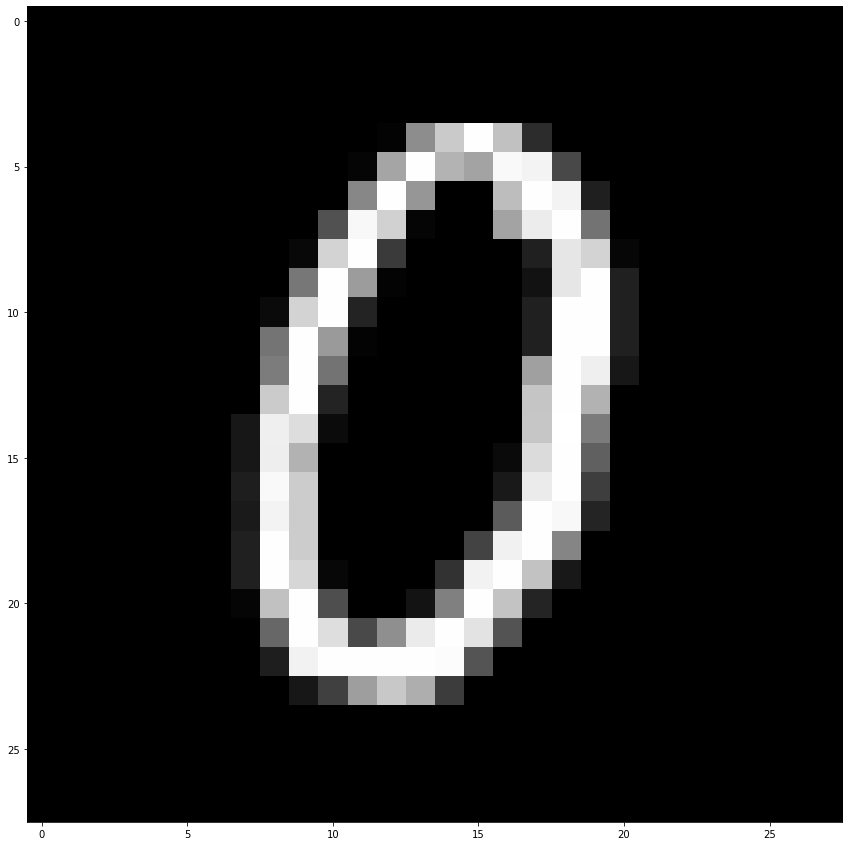

In [52]:
plt.figure(figsize=(20,15))
plt.imshow(grid_data,interpolation=None,cmap='gray')
plt.show()


In [10]:
mnist_df.shape

(42000, 784)

standarize the data

In [11]:
data=mnist_df.head(10000)
label_df=l_df.head(10000)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
standarized_data=StandardScaler().fit_transform(data)

In [18]:
standarized_data.shape

(10000, 784)

finding the covariance matrix

In [19]:
cov_mat_df=np.dot(standarized_data.T,standarized_data)

In [21]:
cov_mat_df.shape

(784, 784)

if i want to convert the  784 dimension  in 2 dimension ,will take the largest two eigen vector and their values 

In [27]:

from scipy.linalg import eigh
values,vectors=eigh(cov_mat_df,eigvals=(782,783))

In [28]:
vectors.shape

(784, 2)

In [29]:
values

array([287901.13418243, 407145.7769519 ])

In [31]:
new_cordinates=np.dot(vectors.T,standarized_data.T)

In [33]:
new_cordinates.shape

(2, 10000)

In [41]:
new_data=np.concatenate((new_cordinates,label_df.to_numpy().reshape(1,10000)),axis=0)

In [43]:
new_data.shape

(3, 10000)

In [44]:
new_df=pd.DataFrame(data=new_data.T,columns=['1d','2d','3d'])

In [51]:
new_df.head(60)

,1d,2d,3d
0,-5.448069,-4.949725,1.0
1,6.833972,18.966372,0.0
2,-2.051008,-7.527935,1.0
3,5.555069,-0.715448,4.0
4,7.291958,26.253689,0.0
5,-0.600439,1.068342,0.0
6,6.158806,-6.276414,7.0
7,4.606639,-0.047253,3.0
8,-1.392136,-0.802741,5.0
9,-2.075362,3.038331,3.0


In [56]:
new_df.columns=['1st_dimension','2nd_dimension','label']
new_df

,1st_dimension,2nd_dimension,label
0,-5.448069,-4.949725,1.0
1,6.833972,18.966372,0.0
2,-2.051008,-7.527935,1.0
3,5.555069,-0.715448,4.0
4,7.291958,26.253689,0.0
...,...,...,...
9995,-3.227868,-0.474806,5.0
9996,0.814569,-0.089362,0.0
9997,-5.235608,-1.546243,4.0
9998,18.981138,2.425728,7.0


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


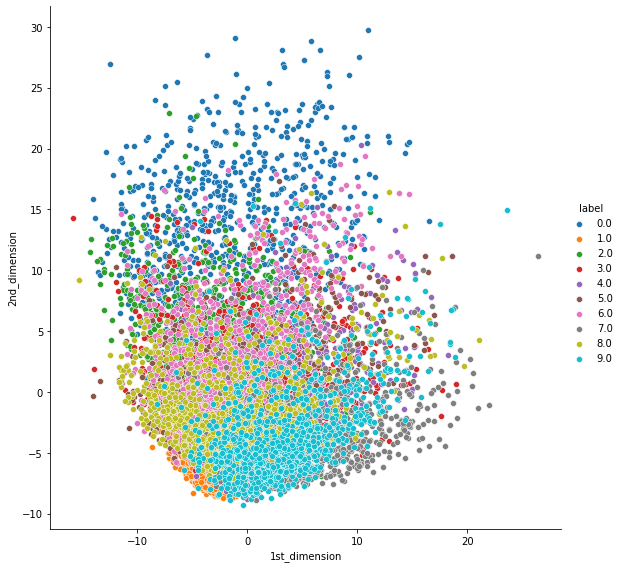

In [66]:
import seaborn as sns 
sns.FacetGrid(new_df,hue='label',size=8).map(sns.scatterplot,'1st_dimension', '2nd_dimension').add_legend()
plt.show()

above step can be done using single line of code using scikit _learn library

In [68]:
from sklearn import decomposition
pca=decomposition.PCA()

In [82]:
pca.n_components=2 ## converting it in two dimension

In [94]:
sample_data=standarized_data
pca_data=pca.fit_transform(sample_data)

In [95]:
pca_data.shape

(10000, 2)

In [98]:
pca_data=np.concatenate((pca_data,label_df.to_numpy().reshape(10000,1)),axis=1)

In [99]:
pca_data.shape

(10000, 3)

In [100]:
pca_df=pd.DataFrame(data=pca_data,columns=['1st_dimension','2nd_dimension','labels'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


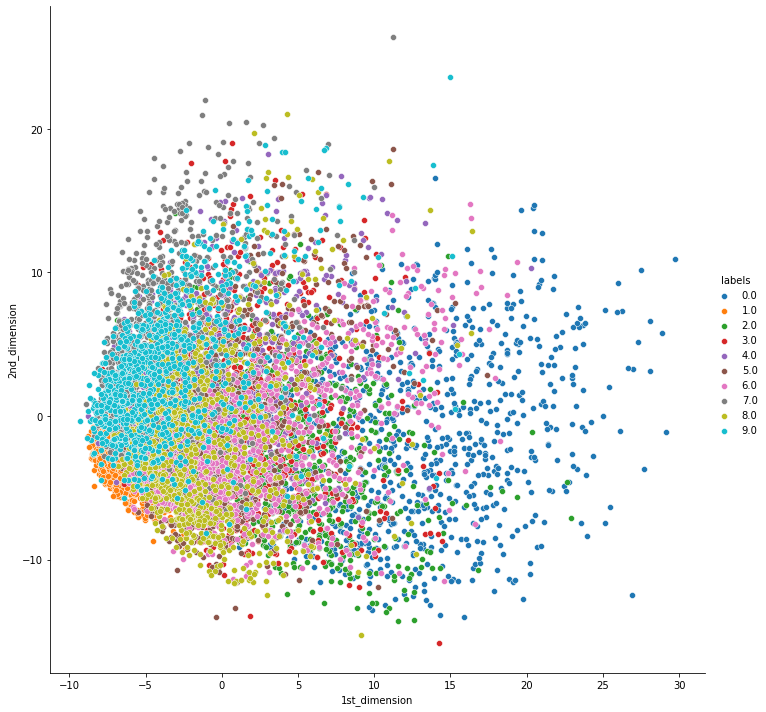

In [103]:
sns.FacetGrid(pca_df,hue='labels',size=10).map(sns.scatterplot,'1st_dimension','2nd_dimension').add_legend()

# t_SNE using scikit learn on mnist

In [127]:
from sklearn.manifold import TSNE
# taking 8000 data points 
standard_data1=StandardScaler().fit_transform(mnist_df)
labels=l_df
# seeting all the parameters
model=TSNE(perplexity=50,n_components=2,random_state=0)
# default perplexity=30
# the number of componenets=2
# default learning rate=200
tsne_data=model.fit_transform(standard_data1)

In [128]:
tsne_data.shape

(42000, 2)

In [129]:
tsne_data=np.concatenate((tsne_data,labels.to_numpy().reshape(42000,1)),axis=1)

In [130]:
tsne_df=pd.DataFrame(data=tsne_data,columns=['Dim1','Dim2','Dim3'])

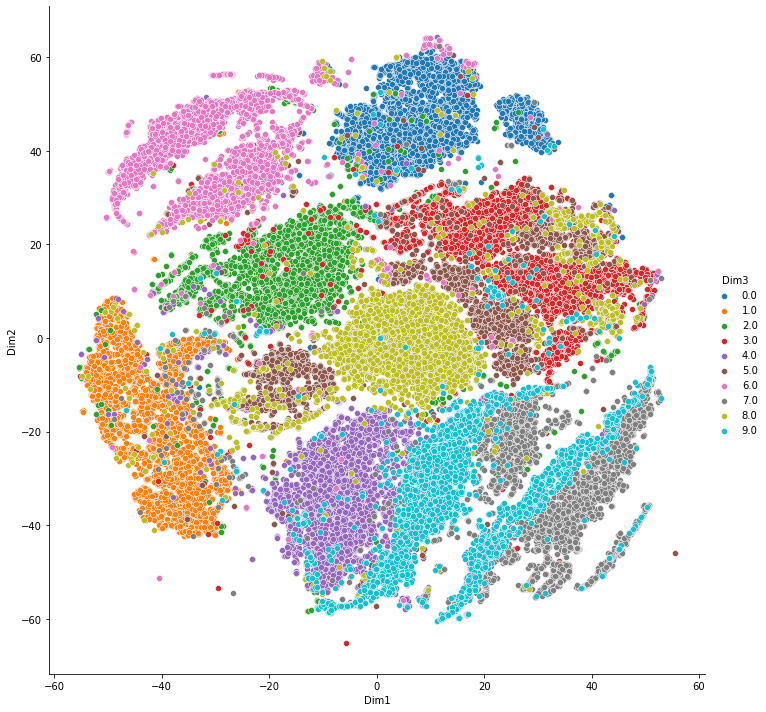

In [132]:
sns.FacetGrid(tsne_df,hue='Dim3',height=10).map(sns.scatterplot,'Dim1','Dim2').add_legend()